# Drzewa decyzyjne (Decision Trees)

In [1]:
from sklearn.datasets import load_iris

from sklearn.tree import (
    DecisionTreeClassifier,
    plot_tree
)

import matplotlib.pyplot as plt

from mlxtend import plotting # https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

In [ ]:
!pip install mlxtend

## Trenowanie pierwszego drzewa dla problemu klasyfikacji

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier

In [21]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [22]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
iris = load_iris()

In [3]:
X = iris.data[:, 2:]
y = iris.target

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## DecisionTreeClassifier

In [4]:
tree_clf = DecisionTreeClassifier(random_state=0) #z domyślnymi parametrami
tree_clf.fit(X, y)

DecisionTreeClassifier(random_state=0)

In [9]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

### Wizualizacja

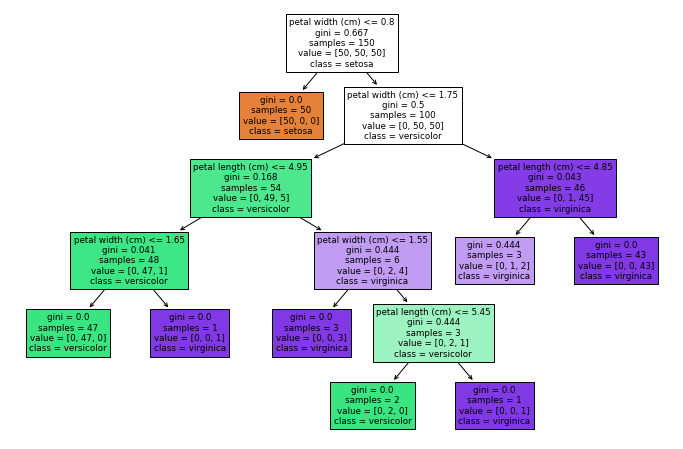

In [8]:
plt.figure(figsize = (12, 8))

plot_tree(tree_clf,
          feature_names = iris.feature_names[2:],
          class_names = iris.target_names,
          filled=True);

In [13]:
from sklearn import tree
text_representation = tree.export_text(tree_clf)
print(text_representation)

|--- feature_1 <= 0.80
|   |--- class: 0
|--- feature_1 >  0.80
|   |--- feature_1 <= 1.75
|   |   |--- feature_0 <= 4.95
|   |   |   |--- feature_1 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_0 >  4.95
|   |   |   |--- feature_1 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  1.55
|   |   |   |   |--- feature_0 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_1 >  1.75
|   |   |--- feature_0 <= 4.85
|   |   |   |--- class: 2
|   |   |--- feature_0 >  4.85
|   |   |   |--- class: 2



Przytnijmy trochę drzewo, żeby łatwiej interpretować wyniki.

In [14]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=99)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=99)

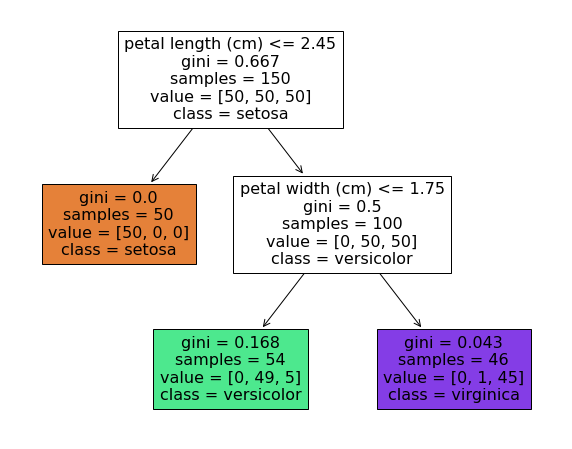

In [16]:
plt.figure(figsize = (10, 8))

plot_tree(tree_clf,
          feature_names = iris.feature_names[2:],
          class_names = iris.target_names,
          filled=True);

### Istotność zmiennych

Ocenia, jak ważna jest każda zmienna dla decyzji podejmowanej przez drzewo.  
Jest to liczba z przedziału od 0 do 1 dla każdej cechy, gdzie 0 oznacza "w ogóle nie używana", a 1 oznacza "doskonale przewiduje target".  
Istotności cech zawsze sumują się do 1.

In [17]:
tree_clf.feature_importances_

array([0.56199095, 0.43800905])

### Granice decyzyjne

In [23]:
def decision_regions(data, target, classifier, figsize=(12, 8)):
    plt.figure(figsize=figsize)
    plotting.plot_decision_regions(X=data, y=target, clf=classifier, legend=2)
    plt.scatter(data[:, 0], data[:, 1], c=["brg"[x] for x in target])

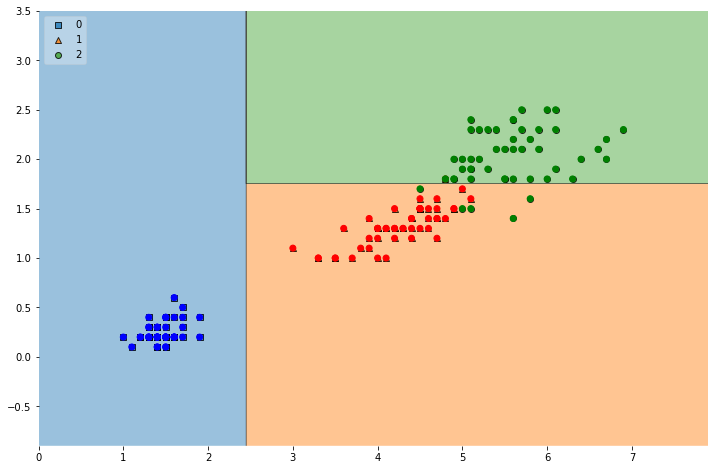

In [24]:
decision_regions(X, y, tree_clf)

## Model Interpretation: White Box Models

## Predykcja

In [37]:
new_obs = [2.80, 1.75]
tree_clf.predict_proba([new_obs])

array([[0.        , 0.90740741, 0.09259259]])

In [38]:
tree_clf.predict([new_obs])

array([1])

In [40]:
iris.target_names[tree_clf.predict([new_obs])[0]]

'versicolor'

# Zadania do przećwiczenia

Dla całości danych iris (4 featury) zbadaj jak na model wpłynie zmiana kryterium nieczystości z gini na entropy (`criterion`).

Można dać max_depth = 2
Narysuj drzewa.  
Oblicz samodzielnie wartości gini i entropy w wybranym węźle.

Narysuj granice decyzyjne dla drzewa decyzyjnego i regresji logistycznej - w tym celu wybierz podzbiór danych iris `iris.data[:,:2]`.   

In [41]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=2)
model_gini.fit(iris.data, iris.target)

model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=2)
model_entropy.fit(iris.data, iris.target);

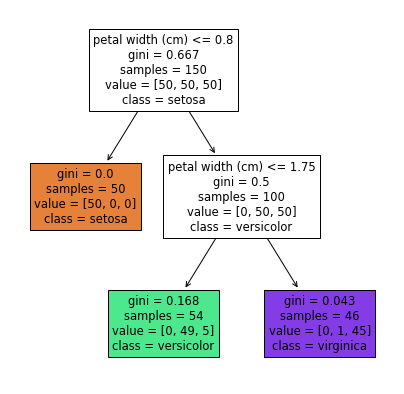

In [42]:
plt.figure(figsize = (7,7))
plot_tree(model_gini, feature_names = iris.feature_names, class_names = iris.target_names, filled=True);

In [45]:
import numpy as np

#gini

proportions = np.array([0, 49/54, 5/54])

gini = 1 - sum(proportions**2)
print('Gini Index', gini)

Gini Index 0.16803840877914955


In [46]:
proportions_2 = np.array([0, 1/46, 45/46])

gini_2 = 1 - sum(proportions_2**2)
print('Gini Index', gini_2)

Gini Index 0.04253308128544431


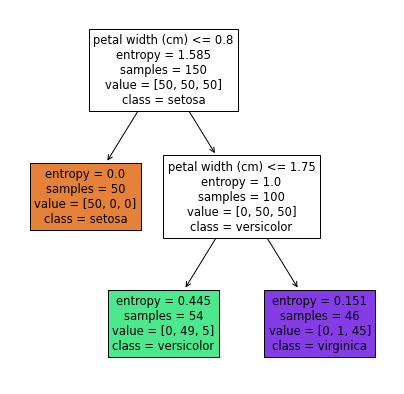

In [51]:
plt.figure(figsize = (7,7))
plot_tree(model_entropy, feature_names = iris.feature_names, class_names = iris.target_names, filled=True);

In [54]:
#entropy
import math

entropy = 0
proportions_entropy = np.array([0,49,5])/54

for i in proportions_entropy:
    if i>0:
        entropy += i * math.log(i,2)
        
print('Entropy:', - entropy)

Entripy: 0.44506485705083865


In [56]:
entropy_2 = 0
proportions_entropy_2 = np.array([0,1,45])/46

for i in proportions_entropy_2:
    if i>0:
        entropy_2 += i * math.log(i,2)
        
print('Entropy:', - entropy_2)

Entropy: 0.15109697051711368


#### Granice decyzyjne - dla nowego modelu iris.data[:,:2]

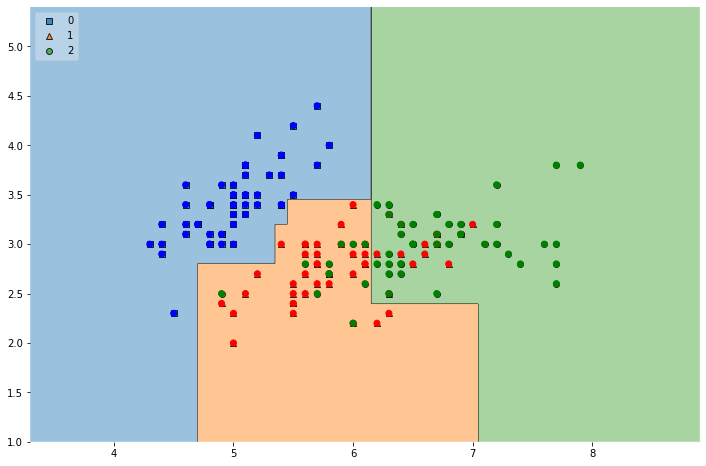

In [58]:
tree_clf_new = DecisionTreeClassifier(max_depth=4, random_state = 99)

tree_clf_new.fit(iris.data[:,:2], iris.target)
decision_regions(iris.data[:,:2], iris.target, tree_clf_new)

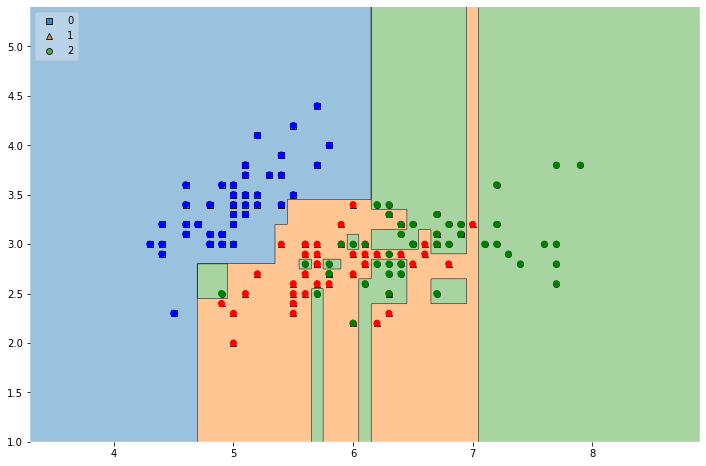

In [59]:
tree_clf_new = DecisionTreeClassifier(max_depth=10, random_state = 99)

tree_clf_new.fit(iris.data[:,:2], iris.target)
decision_regions(iris.data[:,:2], iris.target, tree_clf_new)

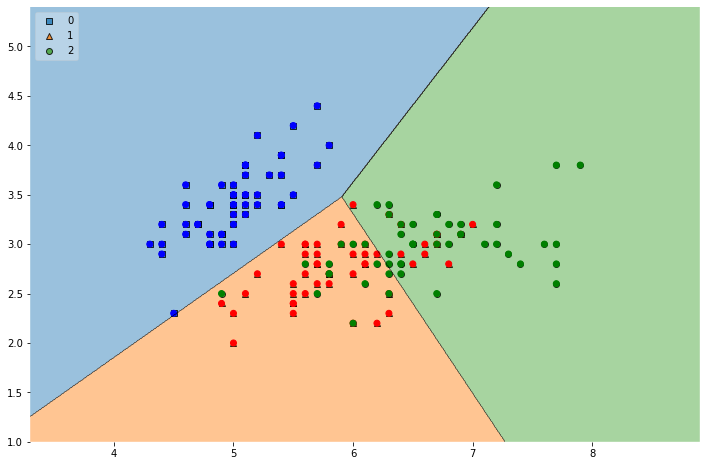

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(iris.data[:,:2], iris.target)
decision_regions(iris.data[:,:2], iris.target, lr)